In [51]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [115]:
milan_data = pd.read_csv('~/Downloads/sms-call-internet-mi-2013-11-01 2.txt', sep='\t',
                   header=None, names = ["Grid", "Time", "Country", "SMSin", "SMSout",
                                         "Callin", "Callout", "Internet"])

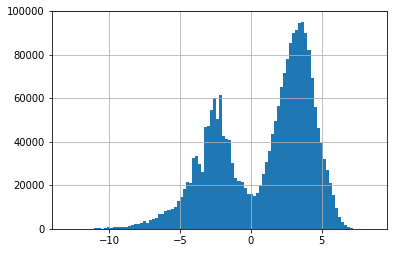

In [116]:
np.log(milan_data["Internet"]).hist(bins=100)

In [117]:
metric = "Internet"
milan_data = milan_data[["Grid", "Country", metric]]
milan_data = milan_data[np.isfinite(milan_data[metric])]
milan_data[metric] = np.log(milan_data[metric])
# data = data.head(1000000)

In [119]:
def moment(n):
    def moment_(x):
        return np.sum(np.power(x, n))
    moment_.__name__ = 'm%s' % n
    return moment_

milan_cube = milan_data.groupby(["Grid", "Country"]).agg({metric: [
    'min',
    'max',
    moment(0),
    moment(1),
    moment(2),
    moment(3),
    moment(4),
    moment(5),
    moment(6),
    moment(7),
    moment(8)
]}).reset_index(col_level=1)
milan_cube.columns = milan_cube.columns.get_level_values(1)
milan_cube

,Grid,Country,min,max,m0,m1,m2,m3,m4,m5,m6,m7,m8
0,1,32,-6.327044,-6.327044,1.0,-6.327044,40.031480,-253.280915,1602.519371,-10139.209808,64151.221753,-4.058876e+05,2.568068e+06
1,1,33,-3.644387,-3.644387,5.0,-18.221936,66.407787,-242.015683,881.998838,-3214.345196,11714.318207,-4.269151e+04,1.555844e+05
2,1,39,1.537467,2.987433,144.0,330.013292,773.554232,1848.858798,4492.688692,11070.839492,27604.827865,6.952730e+04,1.766393e+05
3,1,46,-6.327044,-3.644387,14.0,-61.752045,292.941493,-1497.155026,8174.075159,-46985.529626,280033.523428,-1.708933e+06,1.058344e+07
4,1,49,-3.600852,-3.600852,3.0,-10.802555,38.898396,-140.067348,504.361727,-1816.131707,6539.620669,-2.354820e+04,8.479358e+04
5,2,32,-6.989444,-6.989444,1.0,-6.989444,48.852333,-341.450663,2386.550423,-16680.661453,116588.555547,-8.148892e+05,5.695623e+06
6,2,33,-3.598820,-3.598820,5.0,-17.994100,64.757529,-233.050692,838.707500,-3018.357364,10862.524979,-3.909227e+04,1.406861e+05
7,2,39,1.537771,2.990041,144.0,330.521887,775.984783,1857.718921,4521.806060,11161.606520,27879.122074,7.033982e+04,1.790136e+05
8,2,46,-6.989444,-3.598820,14.0,-63.945978,324.924388,-1831.904037,11223.616691,-72759.360538,488079.272146,-3.337741e+06,2.306386e+07
9,2,49,-3.600852,-3.600852,3.0,-10.802555,38.898396,-140.067348,504.361727,-1816.131707,6539.620669,-2.354820e+04,8.479358e+04


In [124]:
milan_cube.to_csv('lib/src/test/resources/milan_moments_cubed.csv')

In [121]:
def outliers(t, name):
    def outliers_(x):
        return np.sum(x >= t)
    outliers_.__name__ = 'outliers%s' % name
    return outliers_

t1 = milan_data[metric].quantile(0.99)
t5 = milan_data[metric].quantile(0.95)
t10 = milan_data[metric].quantile(0.90)
milan_oracle = milan_data.groupby(["Grid", "Country"]).agg({metric: [
    'count',
    outliers(t1, "1"),
    outliers(t5, "5"),
    outliers(t10, "10")
]}).reset_index(col_level=1)
milan_oracle.columns = milan_oracle.columns.get_level_values(1)
milan_oracle

,Grid,Country,count,outliers1,outliers5,outliers10
0,1,32,1,0.0,0.0,0.0
1,1,33,5,0.0,0.0,0.0
2,1,39,144,0.0,0.0,0.0
3,1,46,14,0.0,0.0,0.0
4,1,49,3,0.0,0.0,0.0
5,2,32,1,0.0,0.0,0.0
6,2,33,5,0.0,0.0,0.0
7,2,39,144,0.0,0.0,0.0
8,2,46,14,0.0,0.0,0.0
9,2,49,3,0.0,0.0,0.0


In [125]:
milan_oracle.to_csv('lib/src/test/resources/milan_oracle_cubed.csv')

# Wikipedia

In [147]:
wiki_data = pd.read_json('~/Downloads/wikipedia-2015-09-12', lines=True)

In [148]:
metric = "delta"
attributes = ["channel", "countryName", "namespace"]
wiki_data = wiki_data[attributes + [metric]]
wiki_data = wiki_data[(np.isfinite(wiki_data[metric])) & (wiki_data[metric] != 0)]
wiki_data[metric] = np.log(np.absolute(wiki_data[metric]))

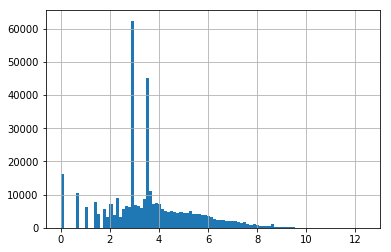

In [149]:
wiki_data["delta"].hist(bins=100)

In [151]:
wiki_cube = wiki_data.groupby(attributes).agg({metric: [
    'min',
    'max',
    moment(0),
    moment(1),
    moment(2),
    moment(3),
    moment(4),
    moment(5),
    moment(6),
    moment(7),
    moment(8)
]}).reset_index(col_level=1)
wiki_cube.columns = wiki_cube.columns.get_level_values(1)
wiki_cube

,channel,countryName,namespace,min,max,m0,m1,m2,m3,m4,m5,m6,m7,m8
0,#ar.wikipedia,Algeria,Main,0.000000,6.666957,18.0,57.644747,234.884785,1108.007978,5842.083979,3.325478e+04,1.988641e+05,1.226715e+06,7.717880e+06
1,#ar.wikipedia,Algeria,نقاش,5.267858,5.267858,1.0,5.267858,27.750330,146.184800,770.080792,4.056676e+03,2.137000e+04,1.125741e+05,5.930244e+05
2,#ar.wikipedia,Australia,Main,5.564520,5.564520,1.0,5.564520,30.963887,172.299183,958.762321,5.335052e+03,2.968701e+04,1.651940e+05,9.192252e+05
3,#ar.wikipedia,Bahrain,Main,3.784190,3.784190,1.0,3.784190,14.320091,54.189941,205.065012,7.760049e+02,2.936550e+03,1.111246e+04,4.205166e+04
4,#ar.wikipedia,Belgium,Main,5.459586,5.459586,1.0,5.459586,29.807074,162.734269,888.461660,4.850632e+03,2.648244e+04,1.445832e+05,7.893641e+05
5,#ar.wikipedia,Denmark,ويكيبيديا,6.030685,6.030685,1.0,6.030685,36.369165,219.330986,1322.716142,7.976885e+03,4.810608e+04,2.901126e+05,1.749578e+06
6,#ar.wikipedia,Egypt,Main,0.693147,8.664060,28.0,124.659483,680.894125,4142.018720,26951.803294,1.839678e+05,1.302402e+06,9.492862e+06,7.087854e+07
7,#ar.wikipedia,Hashemite Kingdom of Jordan,Main,0.693147,5.164786,8.0,19.517211,59.503557,216.944287,908.031706,4.171502e+03,2.025181e+04,1.013195e+05,5.148902e+05
8,#ar.wikipedia,Hashemite Kingdom of Jordan,نقاش المستخدم,4.127134,4.127134,1.0,4.127134,17.033238,70.298463,290.131205,1.197410e+03,4.941874e+03,2.039578e+04,8.417612e+04
9,#ar.wikipedia,Iran,Main,0.693147,0.693147,1.0,0.693147,0.480453,0.333025,0.230835,1.600027e-01,1.109054e-01,7.687378e-02,5.328484e-02


In [152]:
wiki_cube.to_csv('lib/src/test/resources/wiki_moments_cubed.csv')

In [153]:
t1 = wiki_data[metric].quantile(0.99)
t5 = wiki_data[metric].quantile(0.95)
t10 = wiki_data[metric].quantile(0.90)
wiki_oracle = wiki_data.groupby(attributes).agg({metric: [
    'count',
    outliers(t1, "1"),
    outliers(t5, "5"),
    outliers(t10, "10")
]}).reset_index(col_level=1)
wiki_oracle.columns = wiki_oracle.columns.get_level_values(1)
wiki_oracle

,channel,countryName,namespace,count,outliers1,outliers5,outliers10
0,#ar.wikipedia,Algeria,Main,18,0.0,0.0,2.0
1,#ar.wikipedia,Algeria,نقاش,1,0.0,0.0,0.0
2,#ar.wikipedia,Australia,Main,1,0.0,0.0,0.0
3,#ar.wikipedia,Bahrain,Main,1,0.0,0.0,0.0
4,#ar.wikipedia,Belgium,Main,1,0.0,0.0,0.0
5,#ar.wikipedia,Denmark,ويكيبيديا,1,0.0,0.0,1.0
6,#ar.wikipedia,Egypt,Main,28,1.0,4.0,8.0
7,#ar.wikipedia,Hashemite Kingdom of Jordan,Main,8,0.0,0.0,0.0
8,#ar.wikipedia,Hashemite Kingdom of Jordan,نقاش المستخدم,1,0.0,0.0,0.0
9,#ar.wikipedia,Iran,Main,1,0.0,0.0,0.0


In [154]:
wiki_oracle.to_csv('lib/src/test/resources/wiki_oracle_cubed.csv')